In [19]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations, such as arrays and mathematical functions
import pandas as pd  # Pandas for data manipulation and analysis (DataFrame handling)
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations
import seaborn as sns  # Seaborn for data visualization based on Matplotlib, providing better aesthetics

# Scikit-learn preprocessing and models
from sklearn.preprocessing import StandardScaler  # StandardScaler for normalizing features to a standard scale (mean=0, std=1)
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier for decision tree-based classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  
# RandomForestClassifier: Ensemble learning with multiple decision trees (bagging technique)
# AdaBoostClassifier: Adaptive Boosting, an ensemble method that builds weak classifiers iteratively to improve accuracy

from sklearn.linear_model import LogisticRegression  # LogisticRegression for linear classification tasks
from sklearn.model_selection import KFold, LeaveOneGroupOut  
# KFold: Cross-validation technique that splits data into 'k' subsets (folds) for training and validation
# LeaveOneGroupOut: Cross-validation where one group is left out in each iteration for validation

from sklearn.metrics import (
    accuracy_score,  # Function to calculate accuracy of a model
    precision_recall_fscore_support,  # Function to compute precision, recall, and F1-score
    classification_report  # Function to generate a detailed classification performance report
)


In [20]:
# Load the training data (features) from a text file using NumPy's loadtxt function
# "X_train.txt" contains the feature values for the training dataset
X_train = np.loadtxt("UCI HAR Dataset/train/X_train.txt")

# Load the training labels (target/output values) from "y_train.txt"
# Use `.astype(int)` to ensure the labels are integers
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt").astype(int)

# Load the test data (features) from a text file using NumPy's loadtxt function
# "X_test.txt" contains the feature values for the test dataset
X_test = np.loadtxt("UCI HAR Dataset/test/X_test.txt")

# Load the test labels (target/output values) from "y_test.txt"
# Use `.astype(int)` to ensure the labels are integers
y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt").astype(int)

# Load the subject identifiers from the "subject_train.txt" file
# Each row corresponds to a subject (person) in the training data
# This helps track which data belongs to which individual
subjects = np.loadtxt("UCI HAR Dataset/train/subject_train.txt").astype(int)


In [21]:
# Print the shape (dimensions) of the training features (X_train) and training labels (y_train)
# X_train.shape: Shows the number of samples (rows) and features (columns) in the training data
# y_train.shape: Shows the number of labels (one per sample) in the training data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Print the shape (dimensions) of the test features (X_test) and test labels (y_test)
# X_test.shape: Shows the number of samples (rows) and features (columns) in the test data
# y_test.shape: Shows the number of labels (one per sample) in the test data
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (7352, 561), y_train shape: (7352,)
X_test shape: (2947, 561), y_test shape: (2947,)


C:\Users\anshu\AppData\Local\Temp\ipykernel_21444\75268372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


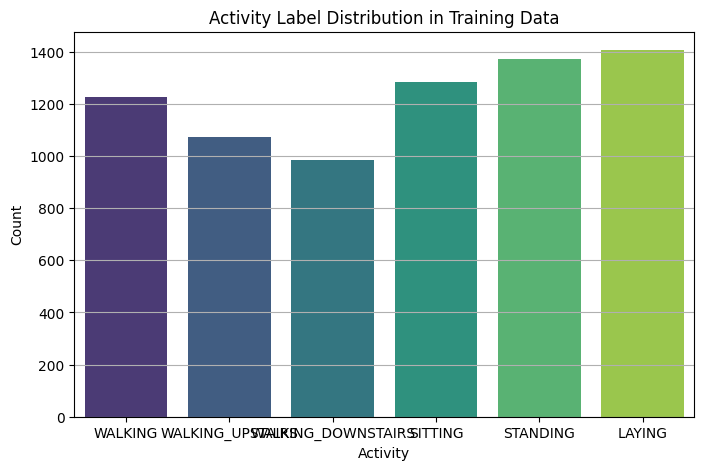

In [22]:
# Compute the unique values (labels) and their counts in the training data labels (y_train)
# np.unique() returns sorted unique elements and their corresponding counts when return_counts=True
unique, counts = np.unique(y_train, return_counts=True)

# Create a new figure for the plot with specified dimensions (8 inches wide, 5 inches high)
plt.figure(figsize=(8, 5))

# Use Seaborn's barplot to visualize the count of each activity label in the training data
# x=unique: The unique activity labels
# y=counts: The frequency (count) of each activity label
# palette="viridis": A colormap for better visualization aesthetics
sns.barplot(x=unique, y=counts, palette="viridis")

# Add a title to the bar plot
plt.title("Activity Label Distribution in Training Data")

# Label the x-axis as 'Activity' and the y-axis as 'Count'
plt.xlabel("Activity")
plt.ylabel("Count")

# Customize the x-axis tick labels to show human-readable activity names
# ticks=unique - 1: Adjusts the position of ticks to align with activity indices
# labels: Custom names for the activities based on the dataset's labels
plt.xticks(ticks=unique - 1, labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", 
                                     "SITTING", "STANDING", "LAYING"])

# Add grid lines along the y-axis to improve readability
plt.grid(axis="y")

# Display the bar plot
plt.show()


In [23]:
# Initialize the StandardScaler to normalize the data
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# "fit" calculates the mean and standard deviation of each feature in X_train
# "transform" scales the training data using the calculated mean and standard deviation
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (mean and standard deviation from X_train)
# This ensures the test data is scaled in the same way as the training data
X_test_normalized = scaler.transform(X_test)


In [29]:
train_accuracy = []
test_accuracy = []

In [30]:
# Iterate through different depths for the Decision Tree from 1 to 20
# The 'max_depth' parameter controls the maximum depth of the decision tree
for depth in range(1, 21):
    
    # Initialize the Decision Tree Classifier with the current 'depth' value
    # 'random_state=42' ensures reproducibility of results
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train (fit) the Decision Tree on the normalized training data and training labels
    clf.fit(X_train_normalized, y_train)
    
    # Evaluate the accuracy of the classifier on the training data
    # Append the training accuracy score to the 'train_accuracy' list
    train_accuracy.append(clf.score(X_train_normalized, y_train))
    
    # Evaluate the accuracy of the classifier on the test data
    # Append the test accuracy score to the 'test_accuracy' list
    test_accuracy.append(clf.score(X_test_normalized, y_test))


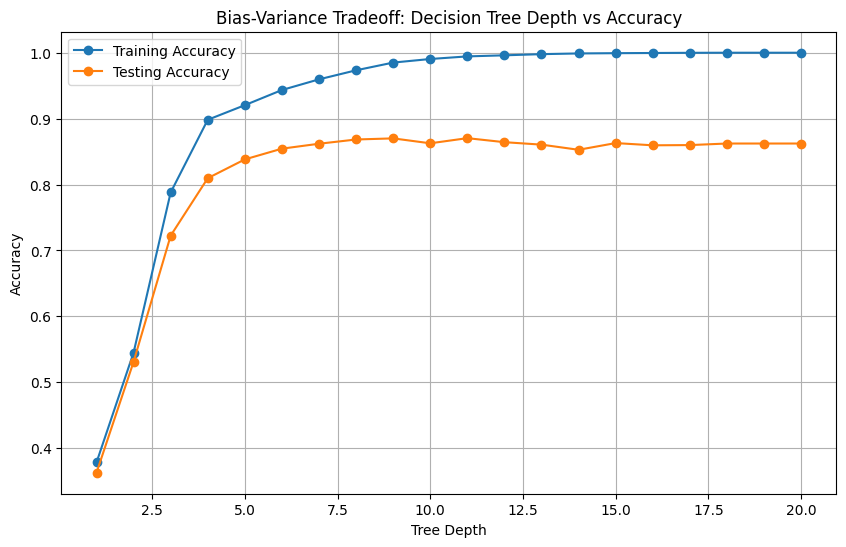

In [31]:
# Plot Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracy, label="Training Accuracy", marker='o')
plt.plot(range(1, 21), test_accuracy, label="Testing Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff: Decision Tree Depth vs Accuracy")
plt.legend()
plt.grid()
plt.show()